# Jacob Pan, Jacobfp2, CHBE 494 Homework 12

## Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold,  cross_val_score

SVC = 0.493446
RF = 0.575986


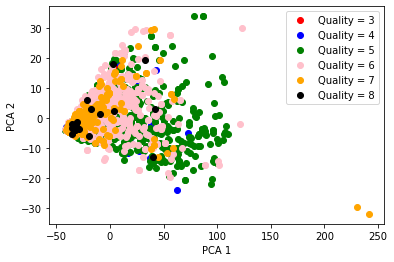

SVC binary soln = 0.746199
RF binary soln = 0.818713


In [2]:
df = pd.read_csv('winequality-red.csv',sep = ";")
x = df.loc[:,'fixed acidity':'alcohol']
y = df.loc[:,'quality']
pca = PCA()
pca.fit(x)
z = pca.transform(x)
z = z[:,:2]
kf = KFold(n_splits=5,shuffle=True)

svc = SVC(kernel='linear')
RF = RandomForestClassifier(n_estimators=1000)
print("SVC = %f" % np.mean(cross_val_score(svc, z, y, cv=kf,n_jobs =-1)))
print("RF = %f" % np.mean(cross_val_score(RF, z, y, cv=kf,n_jobs =-1)))

plt.plot(z[y==3,0], z[y==3,1],'o',color='red',label = 'Quality = 3')
plt.plot(z[y==4,0], z[y==4,1],'o',color='blue',label = 'Quality = 4')
plt.plot(z[y==5,0], z[y==5,1],'o',color='green',label = 'Quality = 5')
plt.plot(z[y==6,0], z[y==6,1],'o',color='pink',label = 'Quality = 6')
plt.plot(z[y==7,0], z[y==7,1],'o',color='orange',label = 'Quality = 7')
plt.plot(z[y==8,0], z[y==8,1],'o',color='black',label = 'Quality = 8')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.legend()
plt.show()

#Higher quality prediction
df = df[df.quality >= 6]
x = df.loc[:,'fixed acidity':'alcohol']
y = df.loc[:,'quality']
pca.fit(x)
z = pca.transform(x)


print("SVC binary soln = %f" % np.mean(cross_val_score(svc, z, y, cv=kf,n_jobs =-1)))
print("RF binary soln = %f" % np.mean(cross_val_score(RF, z, y, cv=kf,n_jobs =-1)))

## Question 2

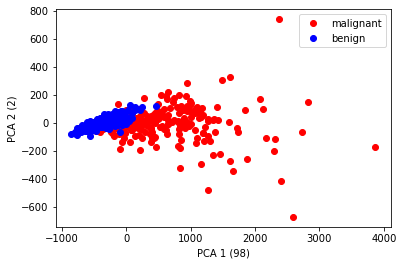

SVC = 0.952523
RF = 0.950753
LR = 0.954293
SVC based on first two principal components = 0.922667
RF based on first two principal components = 0.934948
LR based on first two principal components = 0.924453


In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

x = data.data
y = data.target
pca = PCA()
pca.fit(x)
z = pca.transform(x)
kf = KFold(n_splits=5,shuffle=True)

plt.plot(z[y==0,0],z[y==0,1],'o',color='r',label='malignant')
plt.plot(z[y==1,0],z[y==1,1],'o',color='b',label='benign')
plt.legend()
    
xlabels = pca.explained_variance_ratio_[0] * 100
ylabels = pca.explained_variance_ratio_[1] * 100
plt.xlabel('PCA 1 (%.f)'% xlabels)
plt.ylabel('PCA 2 (%.f)' % ylabels)
plt.show()


svc = SVC(kernel='linear')
RF = RandomForestClassifier(n_estimators=1000)
LR = LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter = 100000)

print("SVC = %f" % np.mean(cross_val_score(svc, z, y, cv=kf,n_jobs =-1)))
print("RF = %f" %np.mean(cross_val_score(RF, z, y, cv=kf,n_jobs =-1)))
print("LR = %f" %np.mean(cross_val_score(LR, z, y, cv=kf,n_jobs =-1)))

#Classification based on first two principal components
z = z[:,:2]
print("SVC based on first two principal components = %f" % np.mean(cross_val_score(svc, z, y, cv=kf,n_jobs =-1)))
print("RF based on first two principal components = %f" % np.mean(cross_val_score(RF, z, y, cv=kf,n_jobs =-1)))
print("LR based on first two principal components = %f" % np.mean(cross_val_score(LR, z, y, cv=kf,n_jobs =-1)))

In [4]:
df = pd.read_csv('abalone.data', sep = ",", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Visceral Weight', 'Shell Weight', 'Rings'])

df['Sex'] = df['Sex'].map({'M' : 1, 'F' : 2, "I" : 3})

x = df.loc[:, 'Sex': 'Shell Weight']
y = df.loc[:, 'Rings']

kf = KFold(n_splits = 5, shuffle = True)
        
svc = SVC(kernel = 'linear')
RF = RandomForestClassifier(n_estimators=1000)
print("SVC = %f" % np.mean(cross_val_score(svc, x, y, cv=kf,n_jobs =-1)))
print("RF = %f" %np.mean(cross_val_score(RF, x, y, cv=kf,n_jobs =-1)))

for i, z in enumerate(df['Rings']):
    if z <= 8:
        df.at[i, 'Rings'] = 1
    if z == 9 or z == 10:
        df.at[i, 'Rings'] = 2
    if z > 10:
        df.at[i, 'Rings'] = 3


print("SVC better classification = %f" % np.mean(cross_val_score(svc, x, y, cv=kf,n_jobs =-1)))
print("RF better classification = %f" %np.mean(cross_val_score(RF, x, y, cv=kf,n_jobs =-1)))


for i, z in enumerate(df['Sex']):
    if z == 1:
        df.at[i, 'Sex'] = 1
    if z == 2:
        df.at[i, 'Sex'] = 2
        
df['Sex'] = df['Sex'][:, np.newaxis]

list = []
for i in range(2,30):
    for i, z in enumerate(df['Rings']):
        if z < i:
            df.at[i, 'Rings'] = 1
        if z >= i:
            df.at[i, 'Rings'] = 2
    
    svc.fit(df['Sex'], df['Rings'])
    list.append(svc.score(df['Sex'], df['Rings']))
    
    
plt.plot(range(2,30), list)
plt.show()


SVC = 0.251372
RF = 0.245149
SVC better classification = 0.640654
RF better classification = 0.646635


ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 2. ... 1. 2. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.